In [9]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("../data/data.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

with open('random-forest.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})")

feature_weights = model.feature_importances_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights,
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)
print("Top 20 features:")
print(feature_weights_mapping)


Accuracy: 98.32% (0.9831571687403182)
Top 20 features:
                feature    weight
109  global_alarm_count  0.327901
110     events_last_24h  0.191094
3             hour_temp  0.065822
6          hour_winddir  0.062271
2         hour_datetime  0.059789
5        hour_windspeed  0.055176
0                  city  0.053336
7       hour_cloudcover  0.044457
8       hour_conditions  0.014978
1          day_datetime  0.013137
4           hour_precip  0.005761
37             reinforc  0.002940
21              mykolay  0.002649
84                 foot  0.001938
10              chernih  0.001841
94                 auth  0.001783
35         northeastern  0.001763
49                sourc  0.001723
42              kremlin  0.001717
97            unsuccess  0.001697


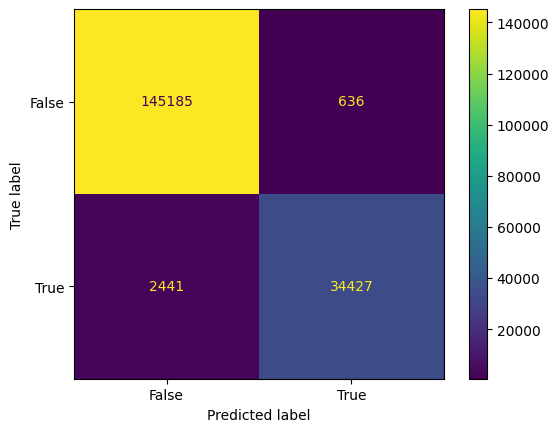

In [10]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()